In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
a = pd.read_csv('/Users/anushakaran/Documents/Capstone/lifeio_all_users_email_activity.csv')
b = pd.read_csv('/Users/anushakaran/Documents/Capstone/client_provided_third_party_data.csv')
merged = a.merge(b, how='right',on='client_id')
c = pd.read_csv('/Users/anushakaran/Documents/Capstone/lifeio_registered_users.csv')
final = c.merge(merged,how='right', on='client_id')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 <a list of 23 Text major ticklabel objects>)

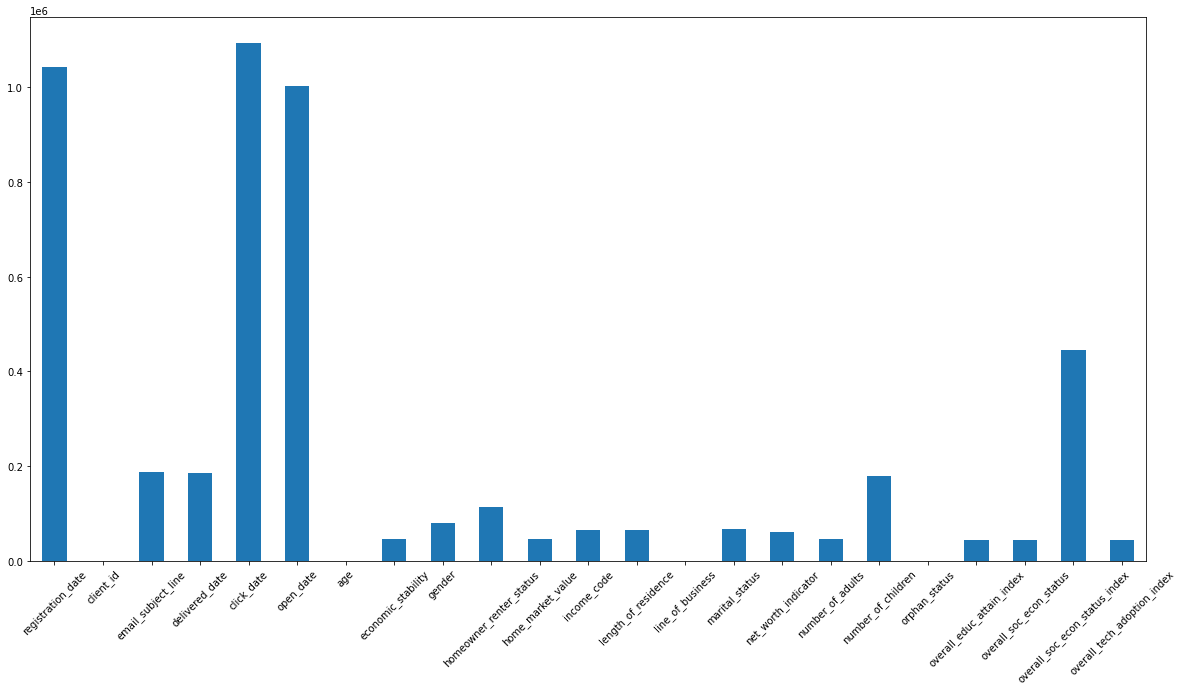

In [4]:
#Summarizing Missing Values
final.isnull().sum().plot(kind='bar', figsize=(20, 10), rot=0);
plt.xticks(rotation=45)

In [5]:
final['SameDayReg'] = np.where(final['delivered_date']== final['registration_date'], 1, 0)
final['Registered?'] = np.where(final['registration_date'].notna(),True,False)

In [6]:
final['gender'] = np.select([final.gender == 'F', final.gender == 'M'], 
                        [0, 1], default=2)

In [7]:
# final['age','economic_stability','income_code','length_of_residence','overall_educ_attain_index','overall_tech_adoption_index']
final['orphan_status'] = np.where(final['orphan_status'] == 'NON-ORPHAN',0,1)
final['homeowner_renter_status'] = np.where(final['homeowner_renter_status'] == 'O',0,1)

In [8]:
final.fillna(0, inplace=True)

In [9]:
# We don't need these columns
to_drop = ['registration_date','email_subject_line','delivered_date','click_date','open_date','line_of_business','home_market_value','marital_status','overall_soc_econ_status']
Registered_feat_space = final.drop(to_drop,axis=1)

In [10]:
Registered_feat_space

,client_id,age,economic_stability,gender,homeowner_renter_status,income_code,length_of_residence,net_worth_indicator,number_of_adults,number_of_children,orphan_status,overall_educ_attain_index,overall_soc_econ_status_index,overall_tech_adoption_index,SameDayReg,Registered?
0,2016112200000322,58,19.0,0,0,9.0,10.0,6.0,2.0,1.0,0,3.0,0.0,4.0,0,True
1,2019122300000084,35,22.0,2,0,3.0,13.0,5.0,1.0,1.0,1,18.0,0.0,14.0,0,True
2,2019121700000635,50,14.0,2,0,8.0,1.0,8.0,4.0,1.0,0,98.0,0.0,97.0,0,True
3,1999120100237070,50,25.0,0,1,6.0,0.0,0.0,1.0,0.0,1,54.0,0.0,23.0,0,True
4,1999120100237070,50,25.0,0,1,6.0,0.0,0.0,1.0,0.0,1,54.0,0.0,23.0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100206,2005090800396225,31,30.0,2,1,4.0,15.0,6.0,1.0,1.0,1,34.0,98.0,14.0,0,False
1100207,2005090800396225,31,30.0,2,1,4.0,15.0,6.0,1.0,1.0,1,34.0,98.0,14.0,0,False
1100208,2005090800396225,31,30.0,2,1,4.0,15.0,6.0,1.0,1.0,1,34.0,98.0,14.0,0,False
1100209,2014041700000035,40,26.0,2,1,3.0,0.0,2.0,1.0,1.0,1,57.0,0.0,49.0,0,False


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Registered_feat_space.drop('Registered?', axis=1), Registered_feat_space['Registered?'], test_size=0.20, random_state=0)

In [12]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
baseline = DummyClassifier(strategy='most_frequent', random_state=0).fit(X_train, y_train)
y_pred = baseline.predict(X_test)
print(round(accuracy_score(y_test, y_pred),4))

0.9474


In [13]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]
for classifier in classifiers:
    model = classifier.fit(X_train, y_train)
    print(classifier)
    print("model score: %.3f" % model.score(X_test, y_test))

KNeighborsClassifier(n_neighbors=3)
model score: 0.998
DecisionTreeClassifier()
model score: 0.997
RandomForestClassifier()
model score: 0.999
AdaBoostClassifier()
model score: 0.951
GradientBoostingClassifier()
model score: 0.951


In [14]:
# from sklearn.model_selection import GridSearchCV
# n_estimators = [100, 300, 500, 800, 1200]
# max_depth = [5, 8, 15, 25, 30]
# min_samples_split = [2, 5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10]
# param_grid = dict(n_estimators = n_estimators, max_depth = max_depth,  
#               min_samples_split = min_samples_split, 
#              min_samples_leaf = min_samples_leaf)
# rf = RandomForestClassifier()
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid)
# best_model = grid_search.fit(X_train, y_train)
# print(round(best_model.score(X_test, y_test),2))
# print(best_model.best_params_)


In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Min = RandomForestClassifier(n_estimators=20, max_features=2, max_depth=2, random_state=0)
Min.fit(X_train, y_train)
predictions = Min.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[208464      0]
 [ 11579      0]]
Classification Report
              precision    recall  f1-score   support

       False       0.95      1.00      0.97    208464
        True       0.00      0.00      0.00     11579

    accuracy                           0.95    220043
   macro avg       0.47      0.50      0.49    220043
weighted avg       0.90      0.95      0.92    220043



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
